In [102]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from pathlib import Path
import seaborn as sns


In [83]:
IMAGE_DIRECTORY_SACOLAS = Path("../files/PLASTICOS_CONFIRMADOS/SACOLAS")
IMAGE_DIRECTORY_GARRAFAS = Path("../files/PLASTICOS_CONFIRMADOS/GARRAFAS")

In [84]:
images_matrix = []

for photo_path in IMAGE_DIRECTORY_SACOLAS.iterdir():
    try:
        image = cv2.imread(photo_path.as_posix())
        gray_scaled_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray_scaled_image, (32,32))
        im_convertida = resized.reshape(-1,resized.shape[0]*resized.shape[1])[0]
        images_matrix.append([i for i in im_convertida])
        
    except:
        print("erro ", photo_path.as_posix())


scaled = np.array(images_matrix)/255
df_sacola = pd.DataFrame(scaled)
df_sacola["y"] = 1

erro  ../files/PLASTICOS_CONFIRMADOS/SACOLAS/IMG_7316(1).HEIC
erro  ../files/PLASTICOS_CONFIRMADOS/SACOLAS/IMG_7316.HEIC
erro  ../files/PLASTICOS_CONFIRMADOS/SACOLAS/IMG_7317(1).HEIC
erro  ../files/PLASTICOS_CONFIRMADOS/SACOLAS/IMG_7317.HEIC
erro  ../files/PLASTICOS_CONFIRMADOS/SACOLAS/IMG_7318(1).HEIC
erro  ../files/PLASTICOS_CONFIRMADOS/SACOLAS/IMG_7318.HEIC
erro  ../files/PLASTICOS_CONFIRMADOS/SACOLAS/IMG_7319(1).HEIC
erro  ../files/PLASTICOS_CONFIRMADOS/SACOLAS/IMG_7319.HEIC
erro  ../files/PLASTICOS_CONFIRMADOS/SACOLAS/IMG_7320(1).HEIC
erro  ../files/PLASTICOS_CONFIRMADOS/SACOLAS/IMG_7320.HEIC
erro  ../files/PLASTICOS_CONFIRMADOS/SACOLAS/IMG_7321.HEIC
erro  ../files/PLASTICOS_CONFIRMADOS/SACOLAS/IMG_7322.HEIC
erro  ../files/PLASTICOS_CONFIRMADOS/SACOLAS/IMG_7323.HEIC
erro  ../files/PLASTICOS_CONFIRMADOS/SACOLAS/IMG_7324(1).HEIC
erro  ../files/PLASTICOS_CONFIRMADOS/SACOLAS/IMG_7324.HEIC
erro  ../files/PLASTICOS_CONFIRMADOS/SACOLAS/IMG_7368.HEIC
erro  ../files/PLASTICOS_CONFIRMADOS/S

In [85]:
images_matrix = []


for photo_path in IMAGE_DIRECTORY_GARRAFAS.iterdir():
    try:
      image = cv2.imread(photo_path.as_posix())
      gray_scaled_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
      resized = cv2.resize(gray_scaled_image, (32,32))
      im_convertida = resized.reshape(-1,resized.shape[0]*resized.shape[1])[0]
      images_matrix.append([i for i in im_convertida])
      
    except:
        print("erro ", photo_path.as_posix())

scaled = np.array(images_matrix)/255
df_garrafa = pd.DataFrame(scaled)
df_garrafa["y"] = 0

In [86]:
df_final = pd.concat([df_garrafa, df_sacola]).sample(frac=1)

x = df_final.drop(["y"], axis=1)
x_reshaped = np.array(x).reshape(x.shape[0], *(32,32,1))
y = df_final["y"]

In [87]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,y
300,0.537255,0.521569,0.525490,0.525490,0.521569,0.545098,0.545098,0.537255,0.529412,0.525490,...,0.737255,0.737255,0.721569,0.721569,0.729412,0.721569,0.721569,0.709804,0.709804,0
590,0.827451,0.823529,0.827451,0.831373,0.831373,0.823529,0.831373,0.847059,0.850980,0.847059,...,0.537255,0.674510,0.784314,0.788235,0.796078,0.792157,0.796078,0.800000,0.796078,0
247,0.564706,0.568627,0.572549,0.556863,0.588235,0.568627,0.560784,0.552941,0.556863,0.560784,...,0.752941,0.752941,0.764706,0.741176,0.760784,0.745098,0.741176,0.737255,0.756863,0
122,0.835294,0.827451,0.819608,0.827451,0.835294,0.847059,0.831373,0.835294,0.831373,0.839216,...,0.447059,0.498039,0.600000,0.674510,0.607843,0.619608,0.686275,0.756863,0.752941,1
338,0.545098,0.556863,0.549020,0.576471,0.545098,0.556863,0.552941,0.552941,0.549020,0.549020,...,0.709804,0.686275,0.670588,0.674510,0.666667,0.682353,0.674510,0.662745,0.674510,0


In [88]:
x_reshaped = np.array(x).reshape(x.shape[0], *(32,32,1))

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x_reshaped, y)

In [90]:
modelo = tf.keras.models.Sequential()

modelo.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,1)))
modelo.add(tf.keras.layers.MaxPooling2D((2,2)))

modelo.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu"))
modelo.add(tf.keras.layers.MaxPooling2D((2,2)))
            
modelo.add(tf.keras.layers.Conv2D(64, (3,3), activation="relu"))
modelo.add(tf.keras.layers.MaxPooling2D((2,2)))

modelo.add(tf.keras.layers.Flatten())
            
modelo.add(tf.keras.layers.Dense(64, activation="relu"))
modelo.add(tf.keras.layers.Dense(100, activation="relu"))
modelo.add(tf.keras.layers.Dense(22, activation="relu"))

modelo.add(tf.keras.layers.Dense(2, activation="softmax"))
modelo.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [91]:
ep_hist = modelo.fit(x_train, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
21/21 [==============================] - 1s 31ms/step - loss: 0.5538 - accuracy: 0.7808 - val_loss: 0.5789 - val_accuracy: 0.7600
Epoch 2/50
21/21 [==============================] - 0s 22ms/step - loss: 0.5161 - accuracy: 0.7808 - val_loss: 0.5342 - val_accuracy: 0.7600
Epoch 3/50
21/21 [==============================] - 0s 22ms/step - loss: 0.5112 - accuracy: 0.7808 - val_loss: 0.5147 - val_accuracy: 0.7600
Epoch 4/50
21/21 [==============================] - 0s 22ms/step - loss: 0.4790 - accuracy: 0.7808 - val_loss: 0.5108 - val_accuracy: 0.7600
Epoch 5/50
21/21 [==============================] - 0s 22ms/step - loss: 0.4198 - accuracy: 0.7808 - val_loss: 0.4810 - val_accuracy: 0.7600
Epoch 6/50
21/21 [==============================] - 0s 22ms/step - loss: 0.4053 - accuracy: 0.7913 - val_loss: 0.5189 - val_accuracy: 0.8267
Epoch 7/50
21/21 [==============================] - 0s 22ms/step - loss: 0.3978 - accuracy: 0.7898 - val_loss: 0.4480 - val_accuracy: 0.7600
Epoch 8/50
21

In [92]:
previsoes = []
for previsao in range(len(modelo.predict(x_test))):
    previsoes.append(np.argmax(modelo.predict(x_test)[previsao]))

In [93]:
report = classification_report(previsoes, y_test)

In [94]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       207
           1       0.87      1.00      0.93        40

    accuracy                           0.98       247
   macro avg       0.93      0.99      0.96       247
weighted avg       0.98      0.98      0.98       247



<AxesSubplot:>

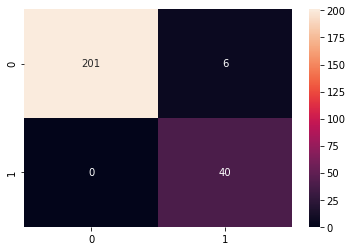

In [104]:
sns.heatmap(confusion_matrix(previsoes, y_test), annot=True, fmt="g")